In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.models import Model

# Load a pre-trained model (e.g., VGG16)
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.output)

# Load and preprocess an example image
img_path = '/content/1.jpg'  # Change this to your image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

np.shape(img_array)
import matplotlib.pyplot as plt
plt.imshow(img_array[0])
def grad_cam(model, img_array, layer_name):
    # Get the target layer
    layer = model.get_layer(layer_name)
    # Create a model that maps the input image to the activations of the target layer
    grad_model = Model(inputs=[model.inputs], outputs=[layer.output, model.output])

    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img_array)
        class_idx = np.argmax(predictions[0])
        class_output = predictions[:, class_idx]

    # Compute gradients
    grads = tape.gradient(class_output, conv_output)[0]
    print("Gradients shape:", grads.shape)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    print("pooled Gradients shape:", pooled_grads.shape)

    # Compute heatmap
    conv_output = conv_output[0]
    heatmap = tf.reduce_mean(conv_output * pooled_grads, axis=-1)
    heatmap = np.maximum(heatmap, 0)

    # Normalize heatmap
    if np.max(heatmap) != 0:
        heatmap /= np.max(heatmap)
    else:
        print("Warning: Maximum value in heatmap is zero. Heatmap normalization may be incorrect.")

    return heatmap

# Display results
def display_heatmap(img_path, heatmap, alpha=0.4):
    img = image.load_img(img_path)
    img = image.img_to_array(img)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(img / 255.0)

    plt.subplot(1, 2, 2)
    plt.title("Grad-CAM Heatmap")
    plt.imshow(img / 255.0)
    plt.imshow(heatmap, cmap='jet', alpha=alpha)
    plt.show()

# Generate the Grad-CAM heatmap
layer_name = 'block5_conv3'  # Example for VGG16
heatmap = grad_cam(model, img_array, layer_name)


display_heatmap(img_path, heatmap)


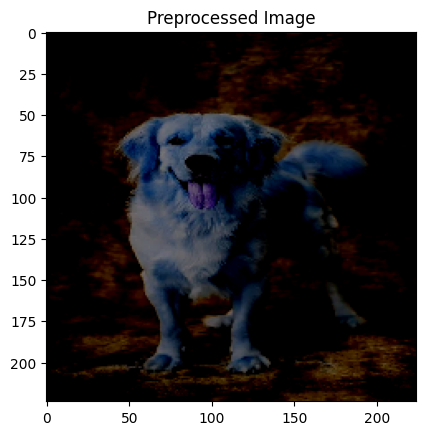

Gradients shape: (14, 14, 512)
Pooled Gradients shape: (512,)
1/1 [==============================] - 1s 684ms/step


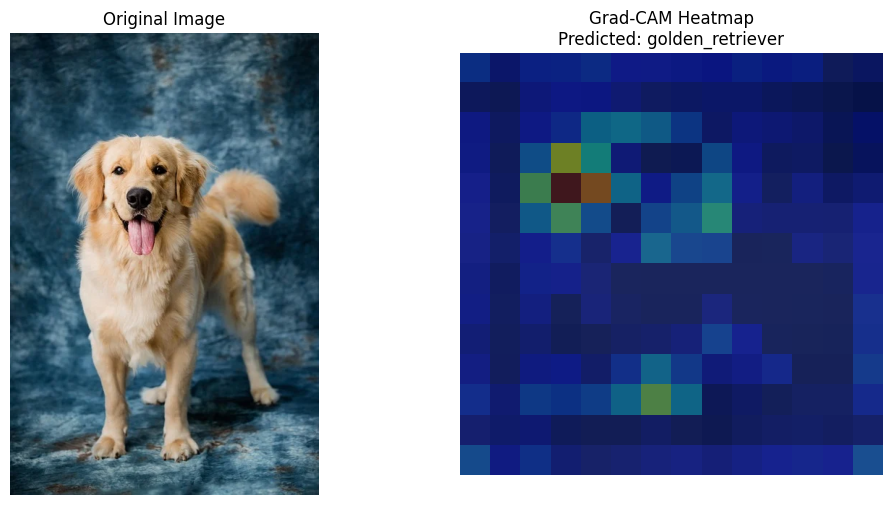

In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.models import Model

# Load a pre-trained model (e.g., VGG16)
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.output)

# Load and preprocess an example image
img_path = '/content/2.jpg'  # Change this to your image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Display the preprocessed image
plt.imshow(img_array[0] / 255.0)
plt.title("Preprocessed Image")
plt.show()

def grad_cam(model, img_array, layer_name):
    # Get the target layer
    layer = model.get_layer(layer_name)
    # Create a model that maps the input image to the activations of the target layer
    grad_model = Model(inputs=[model.inputs], outputs=[layer.output, model.output])

    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img_array)
        class_idx = np.argmax(predictions[0])
        class_output = predictions[:, class_idx]

    # Compute gradients
    grads = tape.gradient(class_output, conv_output)[0]
    print("Gradients shape:", grads.shape)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    print("Pooled Gradients shape:", pooled_grads.shape)

    # Compute heatmap
    conv_output = conv_output[0]
    heatmap = tf.reduce_mean(conv_output * pooled_grads, axis=-1)
    heatmap = np.maximum(heatmap, 0)

    # Normalize heatmap
    if np.max(heatmap) != 0:
        heatmap /= np.max(heatmap)
    else:
        print("Warning: Maximum value in heatmap is zero. Heatmap normalization may be incorrect.")

    return heatmap, class_idx

# Generate the Grad-CAM heatmap
layer_name = 'block5_conv3'  # Example for VGG16
heatmap, predicted_class_idx = grad_cam(model, img_array, layer_name)

# Decode the prediction to get human-readable class label
predictions = model.predict(img_array)
decoded_predictions = decode_predictions(predictions, top=1)[0]
predicted_class_label = decoded_predictions[0][1]  # Label of the top prediction

# Display results
def display_heatmap(img_path, heatmap, predicted_class_label, alpha=0.4):
    img = image.load_img(img_path)
    img = image.img_to_array(img)

    plt.figure(figsize=(12, 6))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(img / 255.0)
    plt.axis('off')

    # Grad-CAM Heatmap
    plt.subplot(1, 2, 2)
    plt.title(f"Grad-CAM Heatmap\nPredicted: {predicted_class_label}")
    plt.imshow(img / 255.0)
    plt.imshow(heatmap, cmap='jet', alpha=alpha)
    plt.axis('off')
    plt.show()

display_heatmap(img_path, heatmap, predicted_class_label)
